In [1]:
from matplotlib import pyplot
import numpy as np

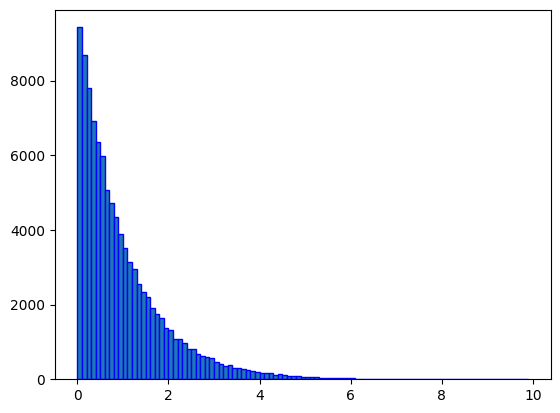

In [9]:
np.random.seed(123)

sample = np.random.exponential(1, 100000)

bin = np.arange(0, 10, 0.1)

pyplot.hist(sample, bins=bin, edgecolor="blue")
pyplot.show()

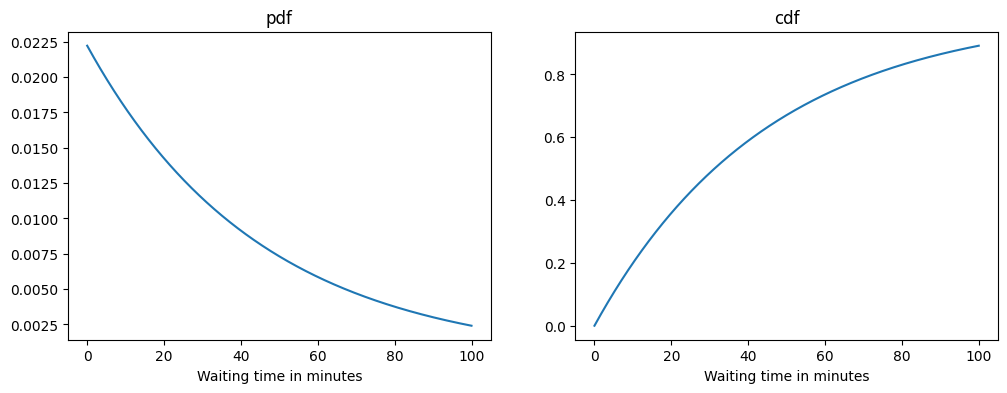

In [35]:
_lambda = 1/45                                              #Mean for exp. distribution = 1/lamdba
X = np.arange(0.01, 100, 0.01)
Y1 = _lambda*np.exp(-_lambda*X)
Y2 = 1-np.exp(-_lambda*X)

fig, (ax1, ax2)  = pyplot.subplots(1, 2, figsize=(12,4))
ax1.plot(X, Y1)
ax1.set(title="pdf", xlabel="Waiting time in minutes")
ax2.plot(X, Y2)
ax2.set(title="cdf", xlabel="Waiting time in minutes")
pyplot.show()

## Exercise 2C

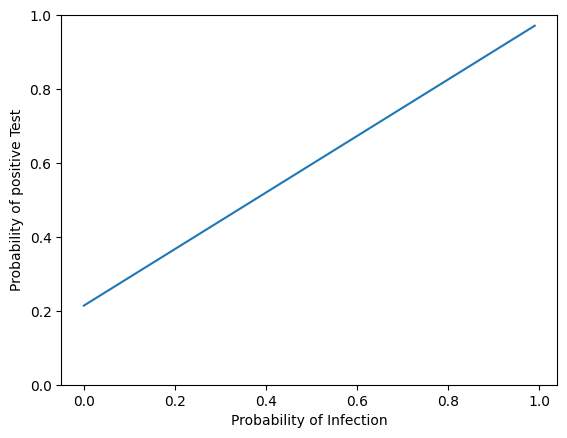

In [48]:
p_inf = 297/8300

p_inf_pt = 0.979*(p_inf)
p_tp = p_inf_pt + ((1-p_inf)-0.786*(1-p_inf))
p_inf_given_pt = p_inf_pt/p_tp

p_inf = np.arange(0, 1, 0.01)
p_inf_pt = 0.979*(p_inf)
p_tp = p_inf_pt + ((1-p_inf)-0.786*(1-p_inf))

pyplot.plot(p_inf, p_tp)
pyplot.ylim([0,1])
pyplot.xlabel("Probability of Infection")
pyplot.ylabel("Probability of positive Test")
pyplot.show()

In [55]:
examples = np.array([7,9,10,11])

test = 3 - examples

print(test)

[-4 -6 -7 -8]


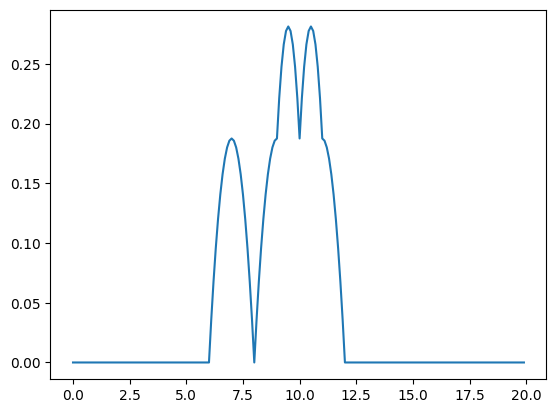

In [75]:
examples = np.array([7,9,10,11])

X = np.arange(0,20,0.1)
Y = np.zeros(X.shape)
for i in range(X.size):
    for j in range(examples.size):
        Y[i] += 3/4*(1-np.square(X[i]-examples[j])) if np.abs(X[i]-examples[j]) <= 1 else 0
    Y[i] *= 1/4
pyplot.plot(X, Y)
#pyplot.ylim([0,1])
pyplot.show()

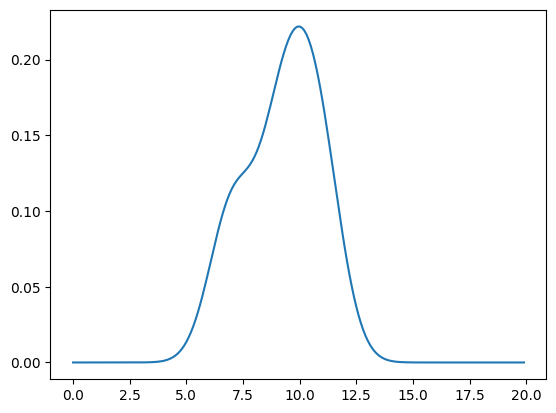

In [71]:
examples = np.array([7,9,10,11])
h = 1

X = np.arange(0,20,0.1)
Y = np.zeros(X.shape)
for i in range(X.size):
    for j in range(examples.size):
        Y[i] += (np.power(2*np.pi, -1/2)*np.exp(-np.power((examples[j]-X[i])/h, 2)/2))
    Y[i] *= 1/(4*h)
pyplot.plot(X, Y)
#pyplot.ylim([0,1])
pyplot.show()

---

# Exercise 5

In [1]:
from matplotlib import pyplot
import numpy as np

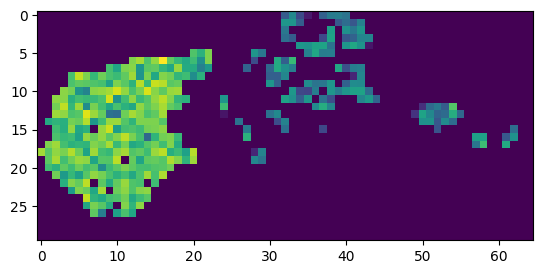

In [2]:
data = np.genfromtxt(open("ex01_tumor_data.csv", "r"), delimiter=" ", skip_header=1)
data = np.delete(data, 0, axis = 1)

pyplot.imshow(data)
pyplot.show()

In [3]:
from scipy import stats

def gaussian(x, sigma):
    return stats.norm.pdf(x, scale=sigma)
    # return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-np.square(x)/(2*np.square(sigma)))

def addGaussian(data, sigma):
    blurred = np.zeros(data.shape)

    for y in range(blurred.shape[0]):
        for x in range(blurred.shape[1]):
            euclid = np.zeros(data.shape)
            for j in range(data.shape[0]):
                for i in range(data.shape[1]):
                    euclid[j][i] = np.sqrt(np.square(y - j)+np.square(x - i))
            gauss = gaussian(euclid, sigma)
            blurred[y][x] += np.sum(gauss*data)
    return blurred

In [4]:
def addGaussian2(data, sigma):
    blurred = np.zeros(data.shape)

    for y in range(blurred.shape[0]):
        for x in range(blurred.shape[1]):
            for j in range(data.shape[0]):
                for i in range(data.shape[1]):
                    euclid = np.sqrt(np.square(y - j)+np.square(x - i))
                    gauss = gaussian(euclid, sigma)
                    blurred[y][x] += gauss*data[j][i]
    return blurred

In [5]:
filtered_01 = addGaussian(data, 0.1)
filtered_1 = addGaussian(data, 1)
filtered_2 = addGaussian(data, 2)
filtered_5 = addGaussian(data, 5)

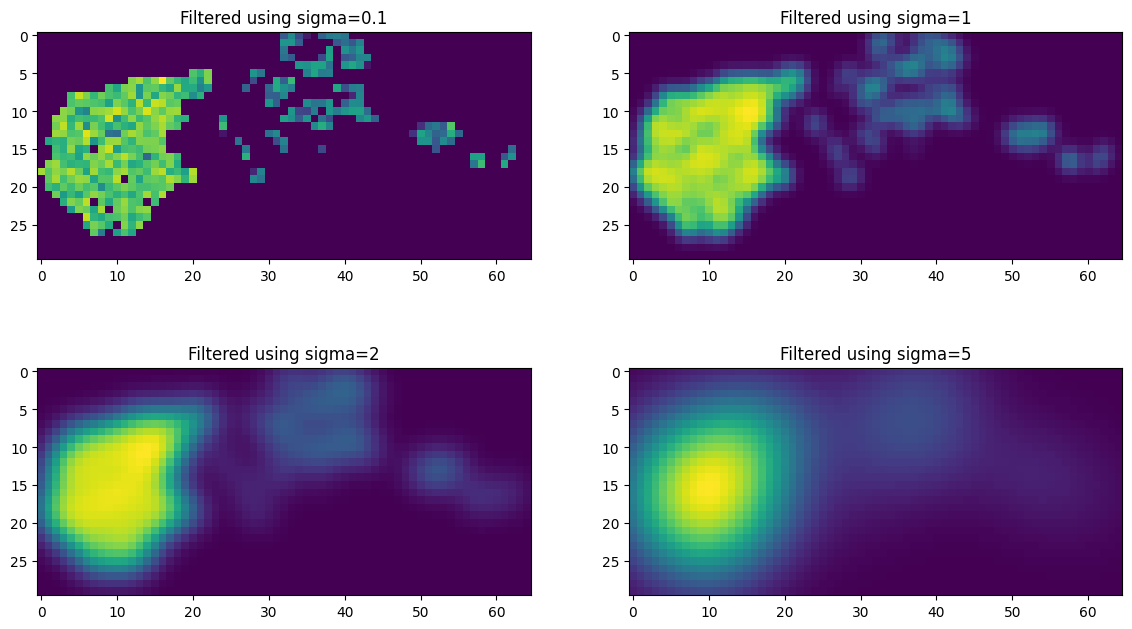

In [200]:
fig, ((ax1, ax2), (ax3, ax4))  = pyplot.subplots(2, 2, figsize=(14,8))
ax1.imshow(filtered_01)
ax1.set(title="Filtered using sigma=0.1")
ax2.imshow(filtered_1)
ax2.set(title="Filtered using sigma=1")
ax3.imshow(filtered_2)
ax3.set(title="Filtered using sigma=2")
ax4.imshow(filtered_5)
ax4.set(title="Filtered using sigma=5")
pyplot.show()

As can be seen in the plot above, $\sigma = 0.1$ does not really smooth the image at all and as such, is not suitable to differentiate the tumor from the surrounding noise. $\sigma = 1$ blurs the image quite well, such that we can **differentiate a bright spot from the environment without losing (maybe) crucial detail**. $\sigma = 2$ further underlines the bright tumor-like spot on the left, while $\sigma = 5$ might blur the image already a little **too much** to see where the tumor is at exactly.

---

# Exercise 6

In [201]:
from matplotlib import pyplot
import numpy as np
from scipy import stats

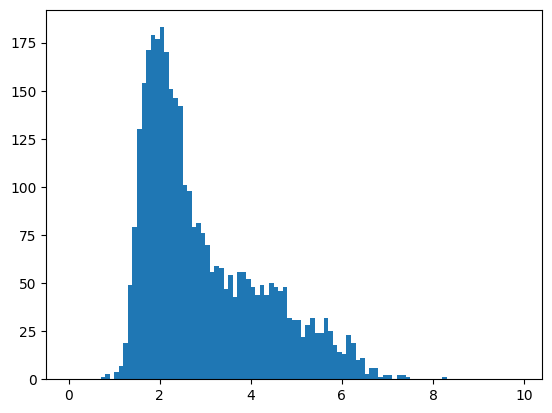

In [210]:
data = np.genfromtxt(open("ex01_credit_scores.csv", "r"), delimiter=";", skip_header=1)
data = np.delete(data, 0, axis = 1)

# print(data)

bins = np.arange(0, 10, 0.1)

pyplot.hist(data, bins=bins)
pyplot.show()

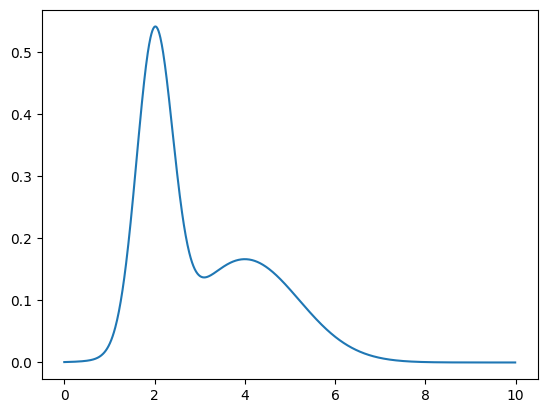

In [212]:
X = np.arange(0, 10, 0.01)

Y1 = stats.norm.pdf(X, loc=2, scale=0.4)
Y2 = stats.norm.pdf(X, loc=4, scale=1.2)

Y = 0.5*Y1+0.5*Y2

pyplot.plot(X, Y)

In [224]:
def kernel(x):
    return np.pi/4*np.cos(np.pi/2*x) if np.abs(x) <= 1 else 0

def applyKernel(Xi, X, h):
    filtered = np.zeros(X.shape)
    n = Xi.size
    
    for i in range(X.size):
        for j in range(Xi.size):
            filtered[i] += kernel((Xi[j]-X[i])/h)
        filtered[i] *= 1/(n*h)
    return filtered
    

In [225]:
filtered_001 = applyKernel(data, X, 0.01)
filtered_01 = applyKernel(data, X, 0.1)
filtered_1 = applyKernel(data, X, 1)
filtered_10 = applyKernel(data, X, 10)

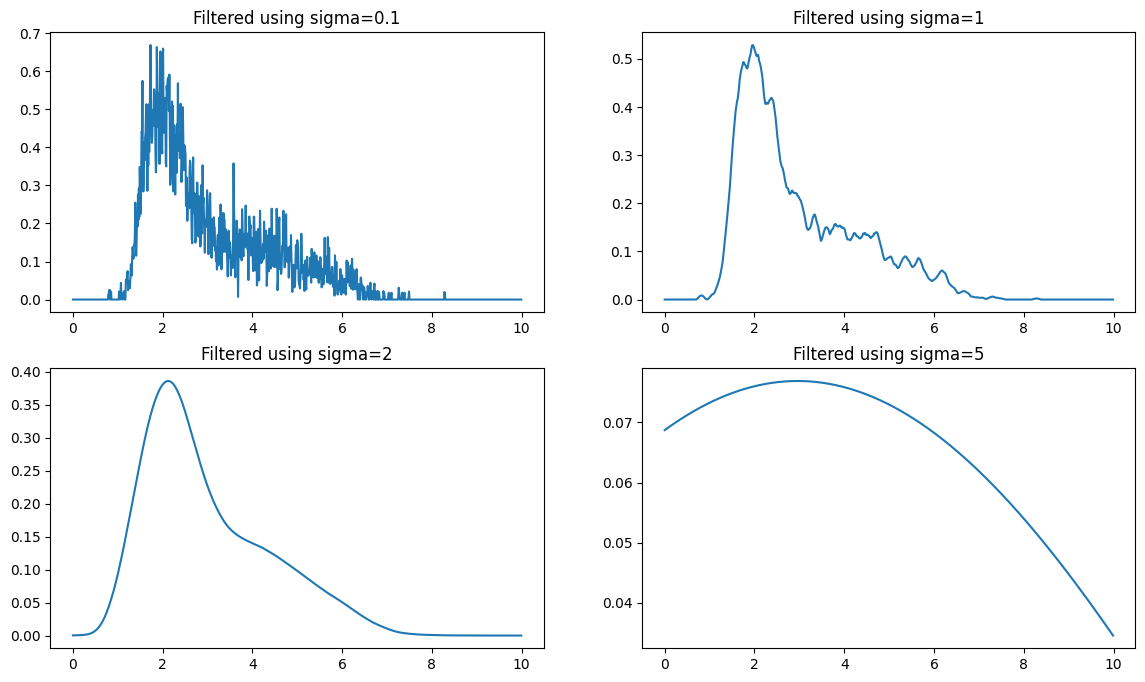

In [241]:
fig, ((ax1, ax2), (ax3, ax4))  = pyplot.subplots(2, 2, figsize=(14,8))
ax1.plot(X, filtered_001)
ax1.set(title="Filtered using sigma=0.1")
ax2.plot(X, filtered_01)
ax2.set(title="Filtered using sigma=1")
ax3.plot(X, filtered_1)
ax3.set(title="Filtered using sigma=2")
ax4.plot(X, filtered_10)
ax4.set(title="Filtered using sigma=5")
pyplot.show()

In [236]:
mse_001 = (np.square(filtered_001 - Y)).mean()
mse_01 = (np.square(filtered_01 - Y)).mean()
mse_1 = (np.square(filtered_1 - Y)).mean()
mse_10 = (np.square(filtered_10 - Y)).mean()
print("MSE for h=0.01: \t"+ str(mse_001))
print("MSE for h=0.1: \t\t"+ str(mse_01))
print("MSE for h=1: \t\t"+ str(mse_1))
print("MSE for h=10: \t\t"+ str(mse_10))

MSE for h=0.01: 	0.002261186510140032
MSE for h=0.1: 		0.0006213384853757793
MSE for h=1: 		0.0019788052139779653
MSE for h=10: 		0.017455132123483395


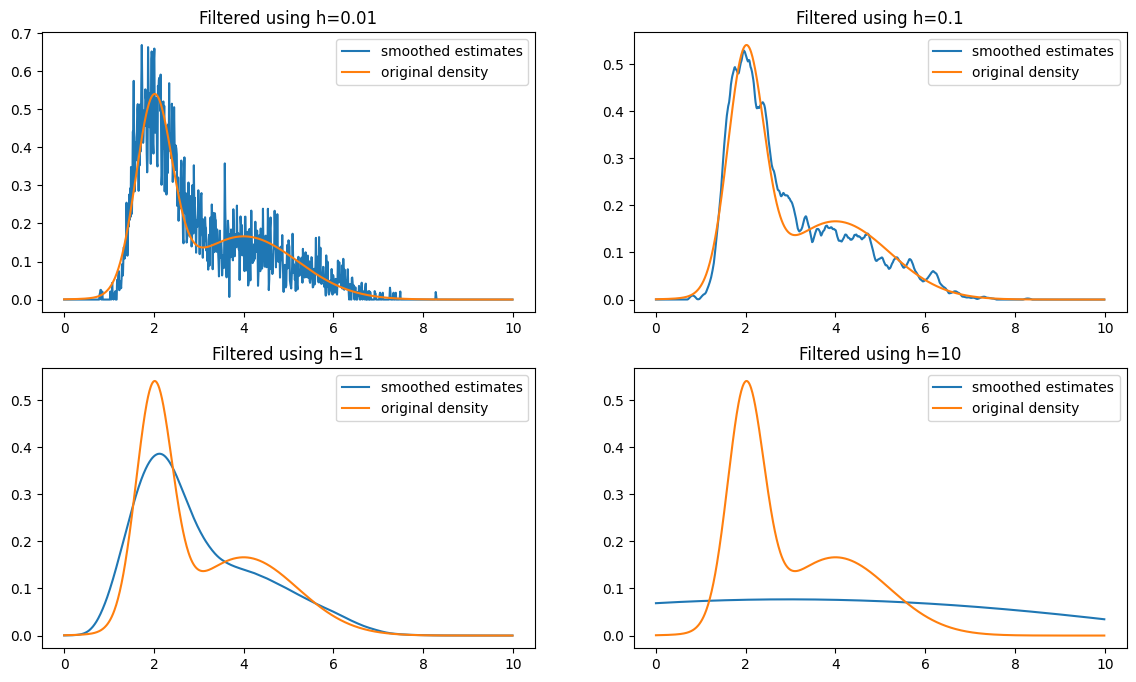

In [255]:
fig, ((ax1, ax2), (ax3, ax4))  = pyplot.subplots(2, 2, figsize=(14,8))
ax1.plot(X, filtered_001, label="smoothed estimates")
ax1.plot(X, Y, label="original density")
ax1.legend()
ax1.set(title="Filtered using h=0.01")
ax2.plot(X, filtered_01, label="smoothed estimates")
ax2.plot(X, Y, label="original density")
ax2.legend()
ax2.set(title="Filtered using h=0.1")
ax3.plot(X, filtered_1, label="smoothed estimates")
ax3.plot(X, Y, label="original density")
ax3.legend()
ax3.set(title="Filtered using h=1")
ax4.plot(X, filtered_10, label="smoothed estimates")
ax4.plot(X, Y, label="original density")
ax4.legend()
ax4.set(title="Filtered using h=10")
pyplot.show()